By [Kevin Michalewicz](https://kevinmichalewicz.com) on Jan 2025

This notebook discusses interpretability in the context of LLM-GCN.

In [1]:
# General imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from gcn_bf.utils.biology_utils import count_consecutive_secondary, is_in_cdr, get_epitope_members, get_paratope_members, get_antigen_only, get_variable_region_only, preprocess_interpretability
from gcn_bf.utils.torch_utils import load_pickle
from gcn_bf.utils.plot_utils import boxplot_delta_e, plot_consecutive_secondary, plot_prediction_errors

/Users/kevinmicha/anaconda3/envs/gcn-bagpype/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Pre-processing

In [2]:
# Getting test set indices
data_path = '../data/'
interpretability_path = 'interpretability_files/'
test_indices = np.load(data_path+'test_indices.npy')
pdb_codes = np.load(data_path+'pdb_codes.npy')
test_set = pdb_codes[test_indices]

# Obtaining corresponding sequences, secondary structure, diversity scores, chain lengths, and members of paratope and epitope
sequences = torch.load(data_path+'sequences.pt', 'rb')
sequences = [sequences[i] for i in test_indices]
residue_ids = list(np.load(interpretability_path+'residue_ids.npy'))

secondary = load_pickle(interpretability_path+'secondary_ag.pkl')
ds = load_pickle(interpretability_path+'conservation_scores.pkl')

heavy = [len(seq.split(':')[0]) for seq in sequences]
light = [len(seq.split(':')[1]) for seq in sequences]

paratope_epitope = torch.load(interpretability_path+'paratope_epitope.pt', 'rb')
paratope_epitope = [paratope_epitope.get(pdb, []) for pdb in test_set]

# Finally, we load the MSEs for sequence alone and when adding the graph path
mse = np.load(interpretability_path+'mse.npy')
mse_seq = np.load(interpretability_path+'mse_seq.npy')
errors = load_pickle(interpretability_path+'errors_with_antigen.pkl')
errors_seq = load_pickle(interpretability_path+'errors_with_antigen_seq.pkl')
delta_e, secondary_v, ds, heavy_v, light_v, epitope_m, paratope_m = preprocess_interpretability(errors, errors_seq, secondary, ds, heavy, light, paratope_epitope)

# For some cases we only need the antibody variable region or antigen only
delta_e_v = get_variable_region_only(delta_e, heavy, light, heavy_v, light_v)
errors_v = get_variable_region_only(errors, heavy, light, heavy_v, light_v)
errors_seq_v = get_variable_region_only(errors_seq, heavy, light, heavy_v, light_v)
delta_e_ag = get_antigen_only(delta_e, heavy, light)
secondary_ag = get_antigen_only(secondary, heavy, light)

## Prediction errors for each antibody position

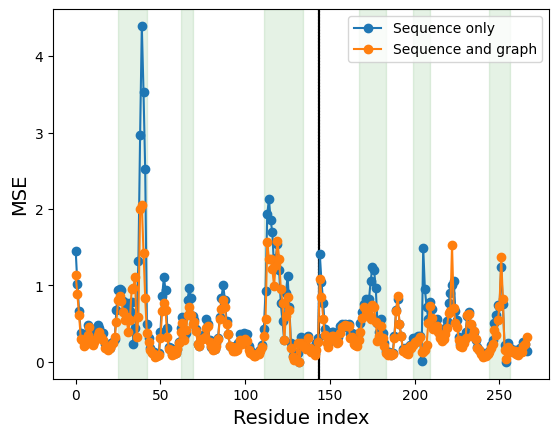

In [3]:
plot_prediction_errors(mse, mse_seq, residue_ids)

## $\Delta e$ against different variables

#### CDR vs Framework

<Figure size 640x480 with 0 Axes>

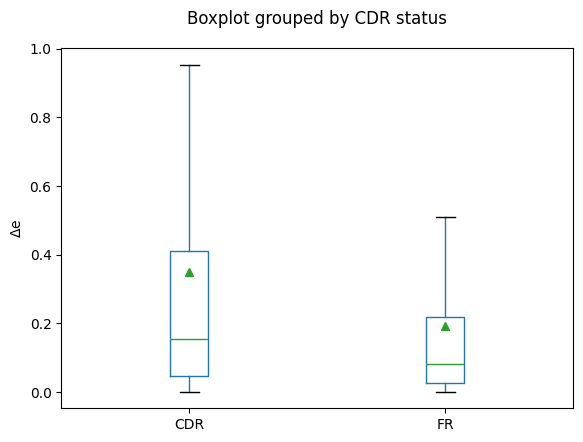

In [4]:
boxplot_delta_e(delta_e_v, secondary_v, ind_class='cdr_status')

#### Antibody secondary structure

<Figure size 640x480 with 0 Axes>

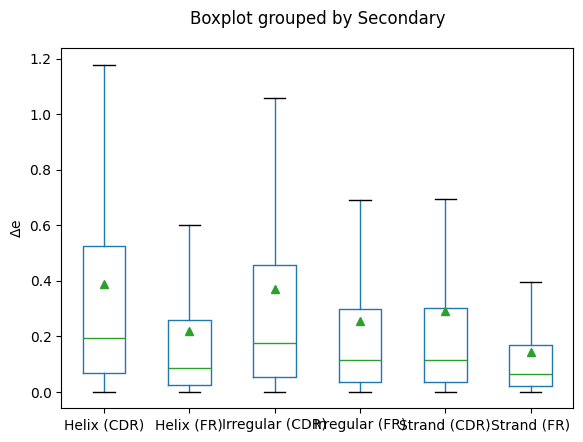

In [5]:
boxplot_delta_e(delta_e_v, secondary_v)

#### Antigen secondary structure

<Figure size 640x480 with 0 Axes>

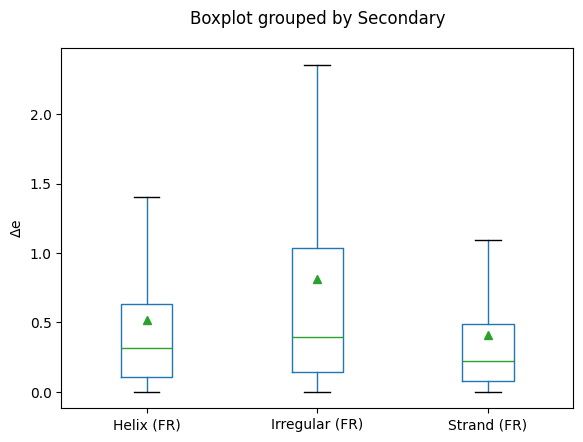

In [6]:
boxplot_delta_e(delta_e_ag, secondary_ag)

#### Diversity scores

0-1    8609
1-2    6922
>2     1855
Name: count, dtype: int64


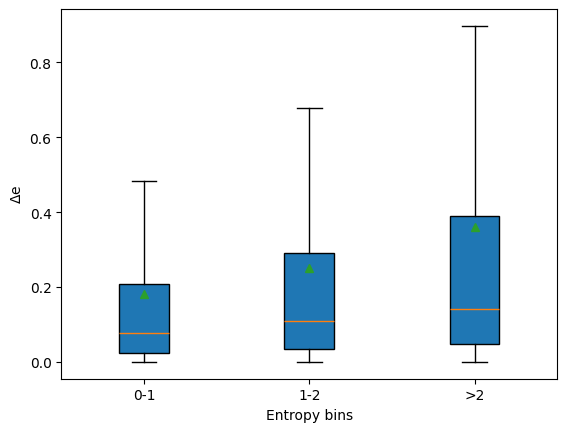

In [7]:
boxplot_delta_e(delta_e_v, ds, ind_class='entropy')

#### Epitope membership

<Figure size 640x480 with 0 Axes>

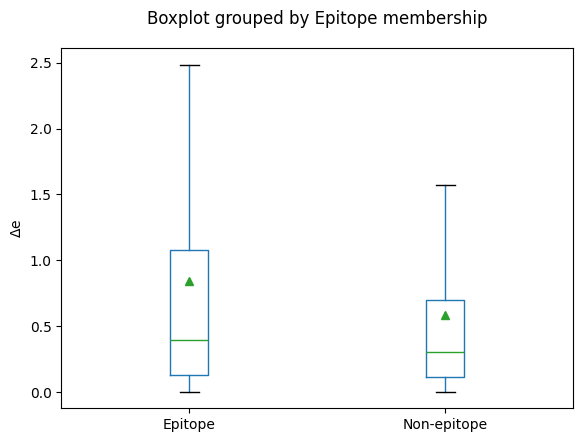

In [8]:
boxplot_delta_e(delta_e_ag, epitope_m, ind_class='epitope')

#### Paratope membership

<Figure size 640x480 with 0 Axes>

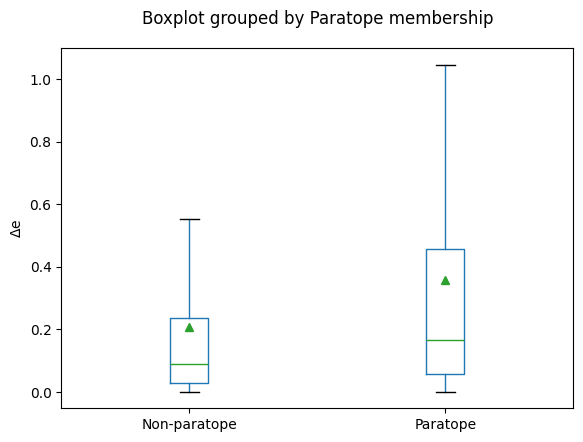

In [9]:
boxplot_delta_e(delta_e_v, paratope_m, ind_class='paratope')

## Consecutive secondary structure motifs

12 consecutive strand - FR: 3, CDR: 0, Total: 3
Average delta_e for 12 consecutive strand - FR: 0.6642310348171223, CDR: 0, Total: 0.6642310348171223
11 consecutive strand - FR: 4, CDR: 2, Total: 6
Average delta_e for 11 consecutive strand - FR: 0.18801786434844622, CDR: 0.3969175545022484, Total: 0.2576510943997136
10 consecutive strand - FR: 6, CDR: 6, Total: 12
Average delta_e for 10 consecutive strand - FR: 0.2943301386820773, CDR: 0.4556389929125241, Total: 0.3749845657973007
9 consecutive strand - FR: 63, CDR: 3, Total: 66
Average delta_e for 9 consecutive strand - FR: 0.16614947333728453, CDR: 0.37424822078146797, Total: 0.17560850731202013
8 consecutive strand - FR: 126, CDR: 7, Total: 133
Average delta_e for 8 consecutive strand - FR: 0.21650689497370862, CDR: 0.3404871084286632, Total: 0.22303216936607465
7 consecutive strand - FR: 180, CDR: 26, Total: 206
Average delta_e for 7 consecutive strand - FR: 0.12289064193007977, CDR: 0.350778144080023, Total: 0.15165314220143183
6 

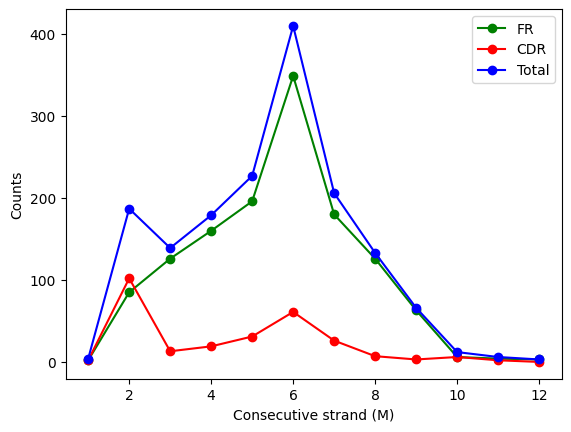

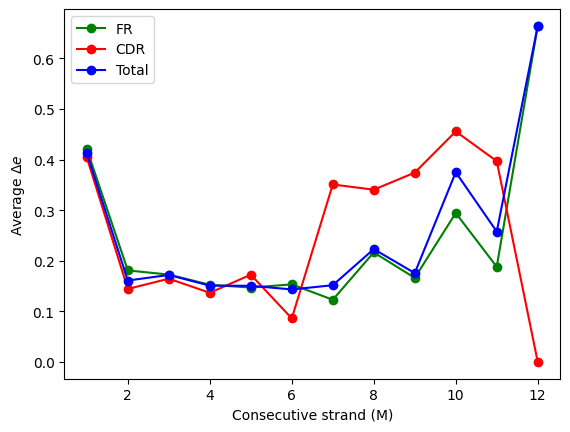

In [10]:
plot_consecutive_secondary(delta_e_v, secondary_v, secondary_type='strand')